In [ ]:
import pandas as pd

# Carregar os dados
try:
    df = pd.read_csv('diabetic_data.csv')
except FileNotFoundError:
    print("O arquivo 'diabetic_data.csv' não foi encontrado.")
    exit()

# Selecionar as colunas numéricas para normalização
numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                'num_medications', 'number_outpatient', 'number_emergency',
                'number_inpatient', 'number_diagnoses']

# Selecionar as colunas numéricas
df_numeric = df[numeric_cols].copy()

# Verificar valores ausentes
print(df_numeric.isnull().sum())

        time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                      1                  41               0                1   
1                      3                  59               0               18   
2                      2                  11               5               13   
3                      2                  44               1               16   
4                      1                  51               0                8   
...                  ...                 ...             ...              ...   
101761                 3                  51               0               16   
101762                 5                  33               3               18   
101763                 1                  53               0                9   
101764                10                  45               2               21   
101765                 6                  13               3                3   

        number_outpatient  

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Ajustar o scaler aos dados numéricos e transformalos
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Exibir linhas dos dados normalizados
print(df_numeric_scaled.head())

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0          0.000000            0.305344        0.000000           0.0000   
1          0.153846            0.442748        0.000000           0.2125   
2          0.076923            0.076336        0.833333           0.1500   
3          0.076923            0.328244        0.166667           0.1875   
4          0.000000            0.381679        0.000000           0.0875   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  
0           0.000000               0.0          0.000000          0.000000  
1           0.000000               0.0          0.000000          0.533333  
2           0.047619               0.0          0.047619          0.333333  
3           0.000000               0.0          0.000000          0.400000  
4           0.000000               0.0          0.000000          0.266667  


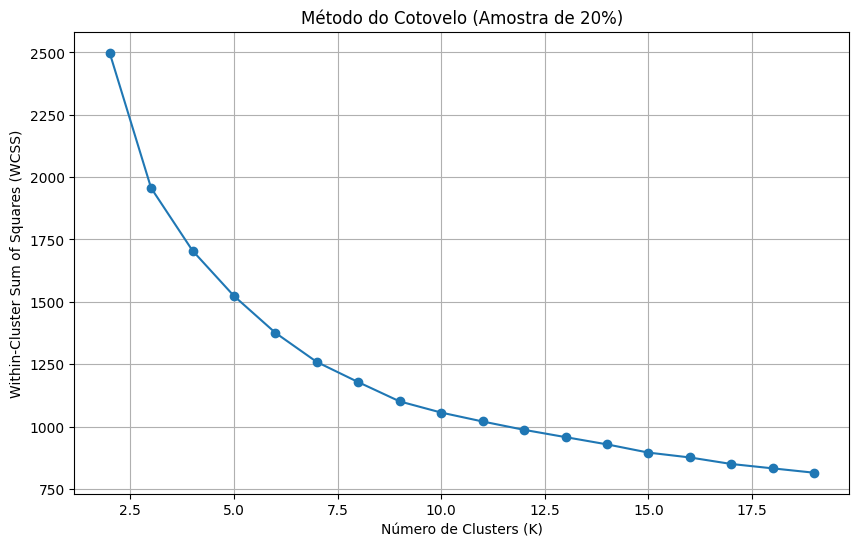

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Amostragem de 20% do dataset
df_amostra = df_numeric_scaled.sample(frac=0.2, random_state=42)

# Intervalo de valores de K
range_k = range(2, 20)

# Aplicar o metodo do cotovelo na amostra
wcss_amostra = []
for k in range_k:
    kmeans_amostra = KMeans(n_clusters=k, random_state=42, n_init=10, algorithm='elkan')
    kmeans_amostra.fit(df_amostra)
    wcss_amostra.append(kmeans_amostra.inertia_)

# gerar o grafico na amostra
plt.figure(figsize=(10, 6))
plt.plot(range_k, wcss_amostra, marker='o', linestyle='-')
plt.title('Método do Cotovelo (Amostra de 20%)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Definir o numero de clusters com base na analise do metodo do cotovelo
n_clusters = 7

# Inicializar e treinar o modelo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, algorithm='elkan')
kmeans.fit(df_numeric_scaled)

# Obter os rotulos dos clusters para cada ponto
labels = kmeans.labels_

# Adicionar os rotulos dos clusters ao df original
df_clustered = df.copy()
df_clustered['cluster'] = labels

# Obter os centroides dos clusters
centroids = kmeans.cluster_centers_

# Exibir os centroides
print("Centroides dos Clusters (K=7):")
print(centroids)

# Exibir o numero de pontos em cada cluster
print("\nNúmero de pontos em cada cluster (K=7):")
print(df_clustered['cluster'].value_counts().sort_index())

Centroides dos Clusters (K=7):
[[0.12518503 0.31380831 0.04882468 0.12264549 0.00459968 0.00192767
  0.02211389 0.24359824]
 [0.20996799 0.40288221 0.0468882  0.1803043  0.01110871 0.00333384
  0.03782314 0.49990735]
 [0.65264493 0.4408798  0.7278167  0.34779809 0.00770369 0.00208737
  0.02989047 0.48588247]
 [0.61945841 0.38620884 0.13415158 0.23393777 0.00856754 0.0026329
  0.04103833 0.46650445]
 [0.19975463 0.2993842  0.40950558 0.1959386  0.00872029 0.00213296
  0.02518113 0.4253227 ]
 [0.15800715 0.28882557 0.8456014  0.20726916 0.00637415 0.00144073
  0.01702685 0.42544423]
 [0.11455583 0.13351271 0.06260962 0.14295916 0.01166315 0.00342382
  0.0295188  0.46289986]]

Número de pontos em cada cluster (K=7):
cluster
0    17206
1    24452
2     6854
3    13977
4    15678
5     7639
6    15960
Name: count, dtype: int64


In [19]:
import numpy as np
import pandas as pd

def infer_cluster(new_data):
    """
    Infer o cluster de uma nova instância de dados.

    Args:
        new_data (dict): Um dicionário contendo os valores das 8 características
                         para a nova instância. As chaves devem ser os nomes das colunas
                         em 'numeric_cols'.

    Returns:
        int: O número do cluster previsto para a nova instância.
        numpy.ndarray: Os centroides de todos os clusters.
    """
    # df com os novos dados e definir os nomes das colunas
    new_df = pd.DataFrame([new_data], columns=numeric_cols)

    # Normalizar os novos dados usando o scaler treinado
    new_df_scaled = scaler.transform(new_df)

    # Criar um df com os dados escalados e os nomes das colunas
    new_df_scaled_with_names = pd.DataFrame(new_df_scaled, columns=numeric_cols)

    # Prever o cluster usando o modelo K-Means treinado
    predicted_cluster = kmeans.predict(new_df_scaled_with_names)[0]

    return predicted_cluster, centroids

# Exemplo de como usar a funçao de inferencia:
novo_paciente = {
    'time_in_hospital': 5,
    'num_lab_procedures': 60,
    'num_procedures': 2,
    'num_medications': 15,
    'number_outpatient': 1,
    'number_emergency': 0,
    'number_inpatient': 1,
    'number_diagnoses': 8
}

cluster_previsto, centroides = infer_cluster(novo_paciente)

print(f"\nA nova instância foi atribuída ao Cluster: {cluster_previsto}")
print("\nCaracterísticas médias do Cluster:")
print(centroides[cluster_previsto])
print("\nInterpretação das características médias do cluster (valores normalizados):")
for i, col in enumerate(numeric_cols):
    print(f"- {col}: {centroides[cluster_previsto][i]:.4f}")


A nova instância foi atribuída ao Cluster: 4

Características médias do Cluster:
[0.19975463 0.2993842  0.40950558 0.1959386  0.00872029 0.00213296
 0.02518113 0.4253227 ]

Interpretação das características médias do cluster (valores normalizados):
- time_in_hospital: 0.1998
- num_lab_procedures: 0.2994
- num_procedures: 0.4095
- num_medications: 0.1959
- number_outpatient: 0.0087
- number_emergency: 0.0021
- number_inpatient: 0.0252
- number_diagnoses: 0.4253
